In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

"""
    Linear regression using the Ridge method
"""

def RidgeRegression(x, y, z, degree=5, l=0.0001):
    """
    :param x: numpy vector of size (n, 1)
    :param y: numpy vector of size (n, 1)
    :param degree: degree of polynomial fit
    :param l: Ridge penalty coefficient
    :return: numpy array with the beta coefficients
    """
    # Calculate matrix with x, y - polynomials
    M_ = np.c_[x, y]
    poly = PolynomialFeatures(degree)
    M = poly.fit_transform(M_)



    # Calculate beta
    A = np.arange(1, degree + 2)
    rows = np.sum(A)
    beta = (np.linalg.inv(M.T.dot(M) + l * np.identity(rows))).dot(M.T).dot(z)

    return beta

#Ordinary Least Squared function
def ols(x, y, z, degree = 5):
    #x: vector of size(n, 1)
    #y: vector of size(n,1)
    # z: vector of size(n,1)
    xyb_ = np.c_[x, y]
    poly = PolynomialFeatures(degree)
    xyb = poly.fit_transform(xyb_)
    beta = np.linalg.inv(xyb.T.dot(xyb)).dot(xyb.T).dot(z)

    return beta

In [2]:
"""
Functions to use in analysis of a regression method
"""

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def FrankeFunction(x,y, noise=0):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return (term1 + term2 + term3 + term4 + noise*np.random.randn(len(x)))

def R2(zReal, zPredicted):
    """
    :param zReal: actual z-values, size (n, 1)
    :param zPredicted: predicted z-values, size (n, 1)
    :return: R2-score
    """
    meanValue = np.mean(zReal)
    numerator = np.sum((zReal - zPredicted)**2)
    denominator = np.sum((zReal - meanValue)**2)
    result = 1 - (numerator/denominator)
    return result

def MeanSquaredError(z, z_hat):
    """
    :param z: actual z-values, size (n, 1)
    :param z_hat: predicted z-values, size (n, 1)
    :return: Mean squared error
    """
    MSE = np.sum((z - z_hat)**2)/len(z)
    return MSE

def betaConfidenceInterval_Ridge(z_real, beta, X, l):
    """
    Compute a 90% confidence interval for the beta coefficients - Ridge
    """

    # Calculate variance squared in the error
    z_hat = X.dot(beta)
    N, P = np.shape(X)
    sigma_2 = (np.sum(np.power((z_real-z_hat), 2)))/N

    # Calculate the variance squared of the beta coefficients
    XTX= X.T.dot(X)
    R, R = np.shape(XTX)
    var_beta = np.diag(sigma_2*np.linalg.inv((XTX + l*np.identity(R))))

    # The square root of var_beta is the standard error. Use it to calculate confidence intervals
    i_minus = beta - 1.645*np.sqrt(var_beta/N)
    i_plus = beta + 1.645*np.sqrt(var_beta/N)

    return i_minus, i_plus

def betaConfidenceInterval_OLS(z_real, beta, X):
    """
    Compute a 90% confidence interval for the beta coefficients
    """

    # Calculate variance squared in the error
    z_hat = X.dot(beta)
    N, P = np.shape(X)
    sigma_2 = (np.sum(np.power((z_real-z_hat), 2)))/N

    # Calculate the variance squared of the beta coefficients
    var_beta = np.diag(sigma_2*np.linalg.inv((X.T.dot(X))))

    # The square root of var_beta is the standard error. Use it to calculate confidence intervals
    i_minus = beta - 1.645*np.sqrt(var_beta/N)
    i_plus = beta + 1.645*np.sqrt(var_beta/N)

    return i_minus, i_plus

def plotFrankes(beta, degree=5):
    """
    Plot Franke's function
    """

    x = np.arange(0, 1, 0.01)
    y = np.arange(0, 1, 0.01)

    x_, y_ = np.meshgrid(x, y)
    x = x_.reshape(-1,1)
    y = y_.reshape(-1,1)

    M = np.c_[x, y]
    poly = PolynomialFeatures(degree=degree)
    M_ = poly.fit_transform(M)
    predict = M_.dot(beta)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(x_, y_, predict.reshape(100, 100), cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

In [11]:
import numpy as np

"""
Generate random data and save it as a .npy-file
"""

def generateData(size):
    """
    :param size: length of output array
    :return: numpy array with random numbers between 0 and 1, shape: (size, 2)
    """
    x = np.random.rand(size, 1)
    y = np.random.rand(size, 1)
    return np.c_[x, y]

data = generateData(1000)
np.save('data.npy', data)

In [12]:
X = np.load('data.npy')
x = X[:, 0]
y = X[:, 1]

In [20]:
x = np.arange(0, 1, 0.005)
y = np.arange(0, 1, 0.005)
#x, y = np.meshgrid(x,y)

In [21]:
z = FrankeFunction(x, y, noise=n)

In [22]:
beta = []
beta = ols(x, y, z, degree=d)

Model of degree 1 with noise: 0, MSE: 0.024470065982356713, R2 score 0.6600787200327598
Model of degree 1 with noise: 0.001, MSE: 0.01737550813158927, R2 score 0.7469196764941051
Model of degree 1 with noise: 0.01, MSE: 0.02421276879686621, R2 score 0.7461658791564985
Model of degree 1 with noise: 0.1, MSE: 0.03309119097960739, R2 score 0.6688208083886309
Model of degree 1 with noise: 0.2, MSE: 0.059932305169372625, R2 score 0.45376031341775513
Model of degree 1 with noise: 0.3, MSE: 0.11064604698577143, R2 score 0.4101635249605614
Model of degree 1 with noise: 0.4, MSE: 0.20069568590997272, R2 score 0.2391393558991367


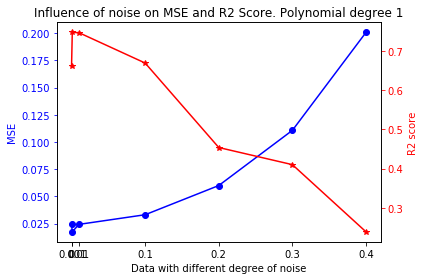

Model of degree 2 with noise: 0, MSE: 0.015430406610583676, R2 score 0.797629738472038
Model of degree 2 with noise: 0.001, MSE: 0.018667999344656943, R2 score 0.7602642259823524
Model of degree 2 with noise: 0.01, MSE: 0.01518307635992429, R2 score 0.8155113547416433
Model of degree 2 with noise: 0.1, MSE: 0.02465430406246142, R2 score 0.7102245251799023
Model of degree 2 with noise: 0.2, MSE: 0.06261287860837196, R2 score 0.48966187548690887
Model of degree 2 with noise: 0.3, MSE: 0.122089162687307, R2 score 0.3853555266948091
Model of degree 2 with noise: 0.4, MSE: 0.22097080763979135, R2 score 0.23424530911451746


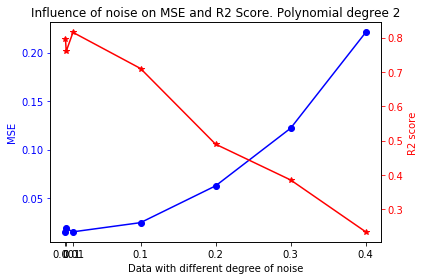

Model of degree 3 with noise: 0, MSE: 0.007918216438198655, R2 score 0.9186675964431106
Model of degree 3 with noise: 0.001, MSE: 0.007793828142513738, R2 score 0.9018997592147244
Model of degree 3 with noise: 0.01, MSE: 0.006814529344382882, R2 score 0.9155532232283317
Model of degree 3 with noise: 0.1, MSE: 0.018168683781570806, R2 score 0.8304094348358299
Model of degree 3 with noise: 0.2, MSE: 0.046565809123832985, R2 score 0.5824833971379286
Model of degree 3 with noise: 0.3, MSE: 0.11861825967109389, R2 score 0.4375121235938837
Model of degree 3 with noise: 0.4, MSE: 0.16739936998703756, R2 score 0.2677836275010177


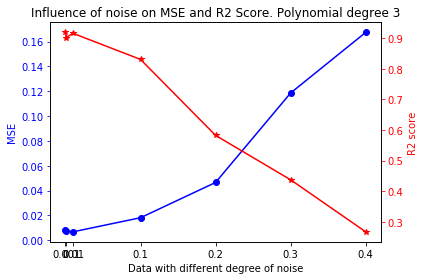

Model of degree 4 with noise: 0, MSE: 0.0034149113220895435, R2 score 0.9574522941144452
Model of degree 4 with noise: 0.001, MSE: 0.004254248815854086, R2 score 0.9519764848590968
Model of degree 4 with noise: 0.01, MSE: 0.004175376882291493, R2 score 0.9460016671480054
Model of degree 4 with noise: 0.1, MSE: 0.013712426167791246, R2 score 0.8595558863775501
Model of degree 4 with noise: 0.2, MSE: 0.039780333100802666, R2 score 0.6763309579761541
Model of degree 4 with noise: 0.3, MSE: 0.09909443324247352, R2 score 0.45893028332260266
Model of degree 4 with noise: 0.4, MSE: 0.18091678364975777, R2 score 0.28168362434214167


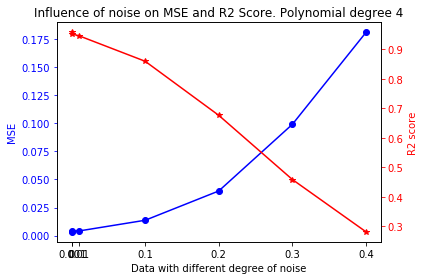

Model of degree 5 with noise: 0, MSE: 0.001832898478518064, R2 score 0.9757080632663998
Model of degree 5 with noise: 0.001, MSE: 0.002025804439749426, R2 score 0.9727677031150737
Model of degree 5 with noise: 0.01, MSE: 0.0022374951349056916, R2 score 0.9740120644605713
Model of degree 5 with noise: 0.1, MSE: 0.013186849502198728, R2 score 0.8674931469965534
Model of degree 5 with noise: 0.2, MSE: 0.039074365762532336, R2 score 0.6595278691210327
Model of degree 5 with noise: 0.3, MSE: 0.10017868862570754, R2 score 0.4241664027984503
Model of degree 5 with noise: 0.4, MSE: 0.1708697410303521, R2 score 0.3857238866179751


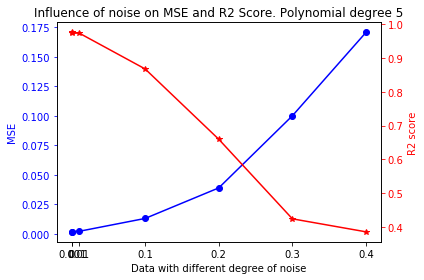

In [13]:

# Load random data
X = np.load('data.npy')
x = X[:, 0]
y = X[:, 1]

#Noise
noises = [0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4]
#text_file = open("Output.txt", "w")
#explore Polynomial degree up to 5th
for d in range(1, 6):
    MSEs = []
    R2Scores = []
    for n in noises:
        z = FrankeFunction(x, y, noise=n)
        beta = []
        beta = ols(x, y, z, degree=d)

        # Generate new test data
        x_test = np.random.rand(200)
        y_test = np.random.rand(200)
        z_test = FrankeFunction(x_test, y_test, noise=n)

        #fit model
        M_ = np.c_[x_test, y_test]
        poly = PolynomialFeatures(d)
        M = poly.fit_transform(M_)

        z_predict= M.dot(beta)
        MSE = MeanSquaredError(z_test, z_predict)
        R2score = R2(z_test, z_predict)
        MSEs.append(MSE)
        R2Scores.append(R2score)
        
        #text_file.write("Model of degree {} with noise: {}, MSE: {}, R2 score {} \n".format(d, n, MSE, R2score))
        print("Model of degree {} with noise: {}, MSE: {}, R2 score {}".format(d, n, MSE, R2score))
      
    #plot MSE and R2 score
    fig2, ax1 = plt.subplots()
    plt.setp(ax1, xticks=[0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4], xticklabels=['0', '0.001', '0.01', '0.1', '0.2', '0.3', '0.4'])
    ax1.plot(noises, MSEs, 'bo-')
    ax1.set_xlabel('Data with different degree of noise')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('MSE', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(noises, R2Scores, 'r*-')
    ax2.set_ylabel('R2 score', color='r')
    ax2.tick_params('y', colors='r')

    plt.title('Influence of noise on MSE and R2 Score. Polynomial degree {}'.format(d))
    fig2.tight_layout()
    plt.show()
    
#text_file.close()

In [11]:
X = np.arange(0, 1, 0.05)
Y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(X,Y)
print(x)
print("-----------")
print(y)

[[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
  0.7  0.75 0.8  0.85 0.9  0.95]
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
  0.7  0.75 0.8  0.85 0.9  0.95]
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
  0.7  0.75 0.8  0.85 0.9  0.95]
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
  0.7  0.75 0.8  0.85 0.9  0.95]
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
  0.7  0.75 0.8  0.85 0.9  0.95]
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
  0.7  0.75 0.8  0.85 0.9  0.95]
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
  0.7  0.75 0.8  0.85 0.9  0.95]
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
  0.7  0.75 0.8  0.85 0.9  0.95]
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
  0.7  0.75 0.8  0.85 0.9  0.95]
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5

In [9]:
"""
    Analysis of a OLS model of Franke's function, using set of 1000 random x and y points
"""

# Load random data, 1000 points
X = np.load('data.npy')
x = X[:, 0]
y = X[:, 1]

In [11]:
#Noise

noises = [0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4]

#Degree
degree = [2, 3, 5, 10, 12, 16]


#GENERAL
MSE_noise1 = []
R2_noise1 = []

In [12]:
z = FrankeFunction(x, y, noise=0)
z001 = FrankeFunction(x, y, noise=0.001)
z01 = FrankeFunction(x, y, noise=0.01)
z1 = FrankeFunction(x, y, noise=0.1)
z2 = FrankeFunction(x, y, noise=0.2)
z3 = FrankeFunction(x, y, noise=0.3)
z4 = FrankeFunction(x, y, noise=0.4)

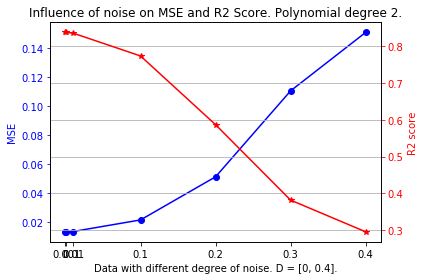

Model of degree 2 with noise: 0, MSE: 0.013092025665440002, R2 score 0.8370765564052481
Model of degree 2 with noise: 0.001, MSE: 0.01306997157694718, R2 score 0.8372736387015143
Model of degree 2 with noise: 0.01, MSE: 0.013271003508222887, R2 score 0.8353288746865548
Model of degree 2 with noise: 0.1, MSE: 0.021285274111661544, R2 score 0.7732004273852147
Model of degree 2 with noise: 0.2, MSE: 0.05107438541178348, R2 score 0.586516205507001
Model of degree 2 with noise: 0.3, MSE: 0.11046236407088024, R2 score 0.3816363174695887
Model of degree 2 with noise: 0.4, MSE: 0.15083215304019582, R2 score 0.2955859245555865


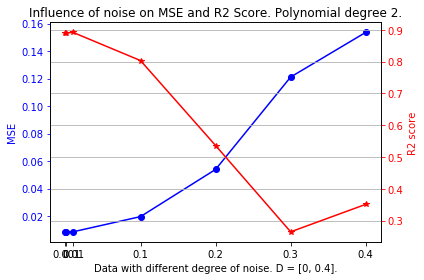

Model of degree 3 with noise: 0, MSE: 0.008512255822826692, R2 score 0.8909342817875185
Model of degree 3 with noise: 0.001, MSE: 0.0085249469735366, R2 score 0.8907986339733338
Model of degree 3 with noise: 0.01, MSE: 0.00846220961096973, R2 score 0.892181858276389
Model of degree 3 with noise: 0.1, MSE: 0.01954769520116356, R2 score 0.8034294984990464
Model of degree 3 with noise: 0.2, MSE: 0.053891036455029385, R2 score 0.5360767814011469
Model of degree 3 with noise: 0.3, MSE: 0.12116467196614096, R2 score 0.2644559685812967
Model of degree 3 with noise: 0.4, MSE: 0.1536699012452228, R2 score 0.35095212940083254


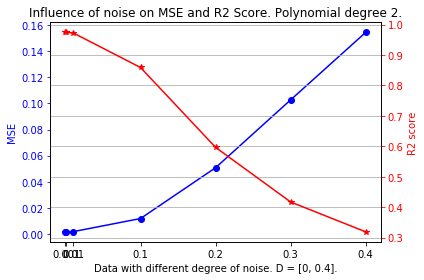

Model of degree 5 with noise: 0, MSE: 0.0018306833222949872, R2 score 0.9742502503658309
Model of degree 5 with noise: 0.001, MSE: 0.0018323558657844686, R2 score 0.9742106959424773
Model of degree 5 with noise: 0.01, MSE: 0.0019349606874039444, R2 score 0.9728186733363212
Model of degree 5 with noise: 0.1, MSE: 0.01199523570801805, R2 score 0.8588436636236347
Model of degree 5 with noise: 0.2, MSE: 0.05081310328992952, R2 score 0.5964272013206062
Model of degree 5 with noise: 0.3, MSE: 0.10265746783283419, R2 score 0.41684304839254593
Model of degree 5 with noise: 0.4, MSE: 0.15422444696487284, R2 score 0.3188633169709849


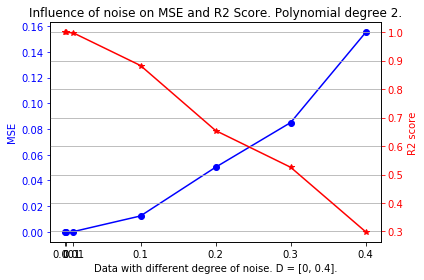

Model of degree 10 with noise: 0, MSE: 5.944363209506323e-05, R2 score 0.9993556256055482
Model of degree 10 with noise: 0.001, MSE: 6.069739666745868e-05, R2 score 0.999342210577283
Model of degree 10 with noise: 0.01, MSE: 0.00017313179383897397, R2 score 0.9981189975890579
Model of degree 10 with noise: 0.1, MSE: 0.01239650067314312, R2 score 0.8828460726047114
Model of degree 10 with noise: 0.2, MSE: 0.050269292459122046, R2 score 0.6544585478785201
Model of degree 10 with noise: 0.3, MSE: 0.0850110667502294, R2 score 0.525423739932533
Model of degree 10 with noise: 0.4, MSE: 0.15512549724787672, R2 score 0.29860121782941573


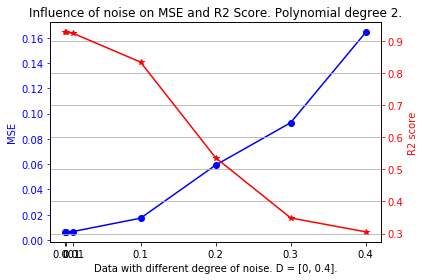

Model of degree 12 with noise: 0, MSE: 0.006453258857635598, R2 score 0.9263567852313882
Model of degree 12 with noise: 0.001, MSE: 0.006456830759469266, R2 score 0.9263131164994496
Model of degree 12 with noise: 0.01, MSE: 0.006685707078248084, R2 score 0.92372268693699
Model of degree 12 with noise: 0.1, MSE: 0.017251425881258782, R2 score 0.8338602797244503
Model of degree 12 with noise: 0.2, MSE: 0.059249281796491145, R2 score 0.5360920067789363
Model of degree 12 with noise: 0.3, MSE: 0.0928822646848211, R2 score 0.3484771377171966
Model of degree 12 with noise: 0.4, MSE: 0.16439929017636545, R2 score 0.30523988040073546


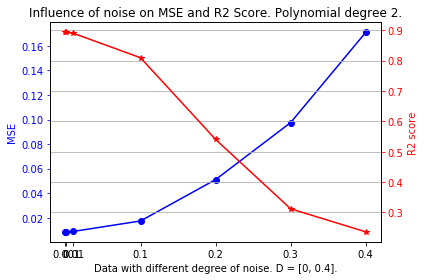

Model of degree 16 with noise: 0, MSE: 0.008572776357207166, R2 score 0.8929039552619186
Model of degree 16 with noise: 0.001, MSE: 0.008582542579717306, R2 score 0.8928197489004075
Model of degree 16 with noise: 0.01, MSE: 0.008850675343207059, R2 score 0.890354872753889
Model of degree 16 with noise: 0.1, MSE: 0.017419288785121213, R2 score 0.8093975461224647
Model of degree 16 with noise: 0.2, MSE: 0.051091372497696144, R2 score 0.540550902064844
Model of degree 16 with noise: 0.3, MSE: 0.09751813681068132, R2 score 0.3121266934731348
Model of degree 16 with noise: 0.4, MSE: 0.17094978169116115, R2 score 0.23633511987516442


In [30]:
for d in degree:
    Bs = []
    Bs001 = []
    Bs01 = []
    Bs1 = []
    Bs2 = []
    Bs3 = []
    Bs4 = []
    
    Bs = ols(x, y, z, degree=d)
    Bs001 = ols(x, y, z001, degree=d)
    Bs01 = ols(x, y, z01, degree=d)
    Bs1 = ols(x, y, z1, degree=d)
    Bs2 = ols(x, y, z2, degree=d)
    Bs3 = ols(x, y, z3, degree=d)
    Bs4 = ols(x, y, z4, degree=d)
    
    # Generate new test data
    x_test = np.random.rand(200)
    y_test = np.random.rand(200)

    z_test = FrankeFunction(x_test, y_test, noise=0)
    z_test001 = FrankeFunction(x_test, y_test, noise=0.001)
    z_test01 = FrankeFunction(x_test, y_test, noise=0.01)
    z_test1 = FrankeFunction(x_test, y_test, noise=0.1)
    z_test2 = FrankeFunction(x_test, y_test, noise=0.2)
    z_test3 = FrankeFunction(x_test, y_test, noise=0.3)
    z_test4 = FrankeFunction(x_test, y_test, noise=0.4)
    
    M_ = np.c_[x_test, y_test]
    poly = PolynomialFeatures(d)
    M = poly.fit_transform(M_)

    MSEs = []
    R2scoreS = []
    
    #Noise = 0
    z_predict= M.dot(Bs)
    MSE = MeanSquaredError(z_test, z_predict)
    R2score = R2(z_test, z_predict)
    MSEs.append(MSE)
    R2scoreS.append(R2score)

    #Noise = 0.001
    z_predict001 = M.dot(Bs001)
    MSE001 = MeanSquaredError(z_test001, z_predict001)
    R2score001 = R2(z_test001, z_predict001)
    MSEs.append(MSE001)
    R2scoreS.append(R2score001)

    ##Noise = 0.01
    z_predict01= M.dot(Bs01)
    MSE01 = MeanSquaredError(z_test01, z_predict01)
    R2score01 = R2(z_test01, z_predict01)
    MSEs.append(MSE01)
    R2scoreS.append(R2score01)

    #Noise = 0.1
    z_predict1= M.dot(Bs1)
    MSE1 = MeanSquaredError(z_test1, z_predict1)
    R2score1 = R2(z_test1, z_predict1)
    MSEs.append(MSE1)
    R2scoreS.append(R2score1)
    ###GENERAL
    MSE_noise1.append(MSE1)
    R2_noise1.append(R2score1)

    #Noise = 0.2
    z_predict2= M.dot(Bs2)
    MSE2 = MeanSquaredError(z_test2, z_predict2)
    R2score2 = R2(z_test2, z_predict2)
    MSEs.append(MSE2)
    R2scoreS.append(R2score2)

    #Noise = 0.3
    z_predict3= M.dot(Bs3)
    MSE3 = MeanSquaredError(z_test3, z_predict3)
    R2score3 = R2(z_test3, z_predict3)
    MSEs.append(MSE3)
    R2scoreS.append(R2score3)

    #Noise = 0.4
    z_predict4= M.dot(Bs4)
    MSE4 = MeanSquaredError(z_test4, z_predict4)
    R2score4 = R2(z_test4, z_predict4)
    MSEs.append(MSE4)
    R2scoreS.append(R2score4)
    
    fig2, ax1 = plt.subplots()
    plt.setp(ax1, xticks=[0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4], xticklabels=['0', '0.001', '0.01', '0.1', '0.2', '0.3', '0.4'])
    ax1.plot(noises, MSEs, 'bo-')
    ax1.set_xlabel('Data with different degree of noise. D = [0, 0.4].')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('MSE', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(noises, R2scoreS, 'r*-')
    ax2.set_ylabel('R2 score', color='r')
    ax2.tick_params('y', colors='r')

    plt.grid(True)
    plt.title('Influence of noise on MSE and R2 Score. Polynomial degree 2.')
    fig2.tight_layout()
    plt.show()

    for i in range(len(noises)):
        print("Model of degree {} with noise: {}, MSE: {}, R2 score {}".format(d, noises[i], MSEs[i], R2scoreS[i]))


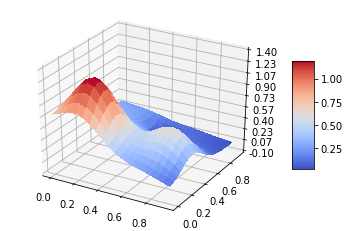

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [2]:
"""
Functions to use in analysis of a regression method
"""
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def FrankeFunction(x,y, noise = 0):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return (term1 + term2 + term3 + term4 + noise*np.random.randn(len(x)))


def R2(zReal, zPredicted):
    """
    :param zReal: actual z-values, size (n, 1)
    :param zPredicted: predicted z-values, size (n, 1)
    :return: R2-score
    """
    meanValue = np.mean(zReal)
    numerator = np.sum((zReal - zPredicted)**2)
    denominator = np.sum((zReal - meanValue)**2)
    result = 1 - (numerator/denominator)
    return result

def MeanSquaredError(z, z_hat):
    """
    :param z: actual z-values, size (n, 1)
    :param z_hat: predicted z-values, size (n, 1)
    :return: Mean squared error
    """
    MSE = np.sum((z - z_hat)**2)/len(z)
    return MSE

def betaCI_OLS(z_real, beta, X):
    """
    Compute a 90% confidence interval for the beta coefficients
    """

    # Calculate variance squared in the error
    z_hat = X.dot(beta)
    N, P = np.shape(X)
    sigma2 = (np.sum(np.power((z_real-z_hat), 2)))/N

    # Calculate the variance squared of the beta coefficients
    var_beta = np.diag(sigma2*np.linalg.inv((X.T.dot(X))))

    # The square root of var_beta is the standard error. Use it to calculate confidence intervals
    ci_minus = beta - 1.645*np.sqrt(var_beta/N)
    ci_plus = beta + 1.645*np.sqrt(var_beta/N)

    return ci_minus, ci_plus


def betaCI_Ridge(z_real, beta, X, l):
    """
    Compute a 90% confidence interval for the beta coefficients - Ridge
    """

    # Calculate variance squared in the error
    z_hat = X.dot(beta)
    N, P = np.shape(X)
    sigma_2 = (np.sum(np.power((z_real-z_hat), 2)))/N

    # Calculate the variance squared of the beta coefficients
    XTX= X.T.dot(X)
    R, R = np.shape(XTX)
    var_beta = np.diag(sigma_2*np.linalg.inv((XTX + l*np.identity(R))))

    # The square root of var_beta is the standard error. Use it to calculate confidence intervals
    ci_minus = beta - 1.645*np.sqrt(var_beta/N)
    ci_plus = beta + 1.645*np.sqrt(var_beta/N)

    return ci_minus, ci_plus

def plotFrankes(x_, y_, z_):
    """
    Plot Franke's function
    """

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(x_, y_, z_, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z - Franke')

    # Add a color bar which maps values to colors.
    clb = fig.colorbar(surf, shrink=0.5, aspect=5)
    clb.ax.set_title('Level')

    plt.savefig('./Figure/Franke.pdf')

#Ordinary Least Squared function
def ols(x, y, z, degree = 5):
    #x: vector of size(n, 1)
    #y: vector of size(n,1)
    #z: vector of size(n,1)
    xyb_ = np.c_[x, y]
    poly = PolynomialFeatures(degree)
    xyb = poly.fit_transform(xyb_)
    beta = np.linalg.inv(xyb.T.dot(xyb)).dot(xyb.T).dot(z)

    return beta

def RidgeRegression(x, y, z, degree=5, l=0.0001):
    """
    :param x: numpy vector of size (n, 1)
    :param y: numpy vector of size (n, 1)
    :param degree: degree of polynomial fit
    :param l: Ridge penalty coefficient
    :return: numpy array with the beta coefficients
    """
    # Calculate matrix with x, y - polynomials
    M_ = np.c_[x, y]
    poly = PolynomialFeatures(degree)
    M = poly.fit_transform(M_)

    # Calculate beta
    A = np.arange(1, degree + 2)
    rows = np.sum(A)
    beta = (np.linalg.inv(M.T.dot(M) + l * np.identity(rows))).dot(M.T).dot(z)

    return beta


Model of degree 1 with noise: 0, MSE: 0.02093989736931544, R2 score 0.7452222357213305 

Model of degree 1 with noise: 0.001, MSE: 0.024997757885148485, R2 score 0.733219680126773 

Model of degree 1 with noise: 0.01, MSE: 0.026423368833641457, R2 score 0.6205313053032682 

Model of degree 1 with noise: 0.1, MSE: 0.038238087498154875, R2 score 0.6425418757526333 

Model of degree 1 with noise: 0.2, MSE: 0.06637425786061163, R2 score 0.4402428149550277 

Model of degree 1 with noise: 0.3, MSE: 0.11774332481959793, R2 score 0.25850039290461624 

Model of degree 1 with noise: 0.4, MSE: 0.18672933238132014, R2 score 0.2472696443556821 

Model of degree 2 with noise: 0, MSE: 0.016548297185389322, R2 score 0.8241881676681154 

Model of degree 2 with noise: 0.001, MSE: 0.01723176149224672, R2 score 0.8028305362505509 

Model of degree 2 with noise: 0.01, MSE: 0.01574143800042819, R2 score 0.8130939662985883 

Model of degree 2 with noise: 0.1, MSE: 0.024362536112176043, R2 score 0.76191288883

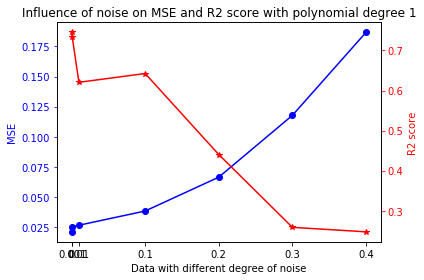

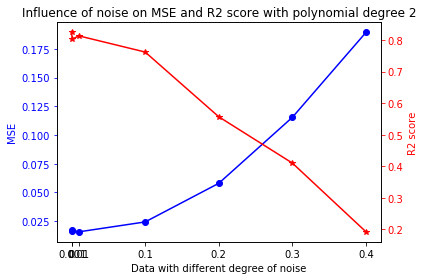

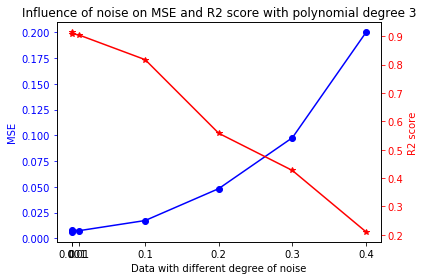

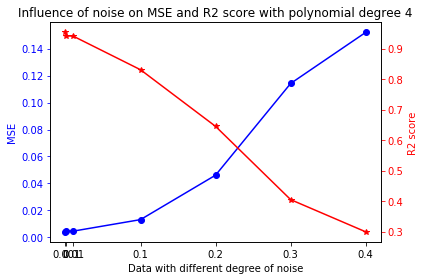

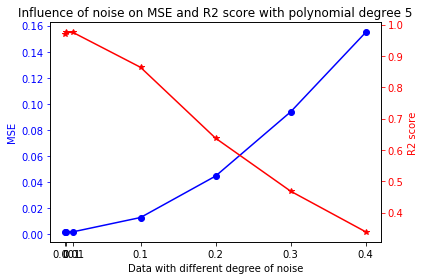

In [16]:

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

"""
    Analysis of Ordinary Least Square (OLS) on the Franke function
"""

# Load random data
X = np.load('data.npy')
x = X[:, 0]
y = X[:, 1]

#Noise
noises = [0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4]
#output the info about MSE and R2
#text_file = open("./Results/MSE_R2_detail.txt", "w")
#explore Polynomial degree up to 5th
for d in range(1, 6):
    MSEs = []
    R2Scores = []
    for n in noises:
        z = FrankeFunction(x, y, noise=n)
        beta = []
        beta = ols(x, y, z, degree=d)

        # Generate new test data
        x_test = np.random.rand(200)
        y_test = np.random.rand(200)
        z_test = FrankeFunction(x_test, y_test, noise=n)

        #fit model
        M_ = np.c_[x_test, y_test]
        poly = PolynomialFeatures(d)
        M = poly.fit_transform(M_)

        z_predict= M.dot(beta)
        MSE = MeanSquaredError(z_test, z_predict)
        R2score = R2(z_test, z_predict)
        MSEs.append(MSE)
        R2Scores.append(R2score)

        print("Model of degree {} with noise: {}, MSE: {}, R2 score {} \n".format(d, n, MSE, R2score))

    #plot MSE and R2 score
    fig2, ax1 = plt.subplots()
    plt.setp(ax1, xticks=[0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4], xticklabels=['0', '0.001', '0.01', '0.1', '0.2', '0.3', '0.4'])
    ax1.plot(noises, MSEs, 'bo-')
    ax1.set_xlabel('Data with different degree of noise')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('MSE', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(noises, R2Scores, 'r*-')
    ax2.set_ylabel('R2 score', color='r')
    ax2.tick_params('y', colors='r')

    plt.title('Influence of noise on MSE and R2 score with polynomial degree {}'.format(d))
    fig2.tight_layout()
    #plt.savefig('./Figure/Degree {}.pdf'.format(d))

#text_file.close()

########################################################################################################
#confidence interval
########################################################################################################
# Generate test data
x_test = np.random.rand(1000)
y_test = np.random.rand(1000)
z_test = FrankeFunction(x_test, y_test, noise=0.1)


# Calculate beta values and polynomial matrix
beta = ols(x, y, z, degree=5)
M_ = np.c_[x_test, y_test]
poly5 = PolynomialFeatures(5)
M = poly5.fit_transform(M_)

print(z_test.shape)
print(beta.shape)
print(M.shape)
# Calculate beta confidence intervals
conf1, conf2 = betaCI_OLS(z_test, beta, M)
#text_file = open("./Results/BetaCI_ols.txt", "w")
print(conf2.shape)
for i in range(len(conf1)):
    print('Beta {0}: {1:5f} & [{2:5f}, {3:5f}]'.format(i, beta[i], conf1[i], conf2[i]))
